# Temporary Notebook for testing ContourGraph and RegionSlice creation


In [1]:
from collections import defaultdict
from collections import Counter

import pandas as pd
from shapely.geometry import Polygon


In [2]:
# Local functions and classes
from types_and_classes import *
from utilities import *
from contours import *
from contour_graph import *
from debug_tools import *
#from structures import *
from region_slice import *
#from structure_set import *
from relations import *


### Global Settings

In [3]:
PRECISION = 2

In [4]:
%matplotlib inline

# RegionSlice requirements
- The RegionIndexes used as keys in the dictionary attributes should match across slices as much as possible.
- region MultiPolygons should include islands or relations might mistakenly identify a ring as overlapping whin it is interior to a shell, but exterior to an island.
- boundaries must be kept separate even if they are related to the same region.
- every contour of a given ROI on the same slice should be in the same RegionSlice

In [5]:
def surrounds_example3():
    box10x5 = box_points(10,5)
    circle4_left = circle_points(2, offset_x=-3)
    circle3_right = circle_points(1.5, offset_x=3)
    circle2_left = circle_points(1, offset_x=-3, offset_y=0.5)
    circle2_right = circle_points(1, offset_x=3)
    slice_data = [
        ContourPoints(box10x5, roi=0, slice_index=1.0),
        ContourPoints(circle4_left, roi=0, slice_index=1.0),
        ContourPoints(circle3_right, roi=0, slice_index=1.0),
        ContourPoints(circle2_right, roi=0, slice_index=1.0),
        ContourPoints(circle2_left, roi=1, slice_index=1.0),
        ]
    contour_table, slice_sequence = build_contour_table(slice_data)
    contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                        slice_sequence,
                                                        roi=0)
    contour_graph_b, slice_sequence = build_contour_graph(contour_table,
                                                        slice_sequence,
                                                        roi=1)
    region_slice_a = RegionSlice(contour_graph_a, slice_index=1.0)
    region_slice_b = RegionSlice(contour_graph_b, slice_index=1.0)
    return region_slice_a, region_slice_b


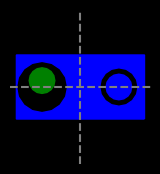

|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|

Relationship: Surrounds


In [6]:

a, b = surrounds_example3()
ax = plot_ab(a.regions['0A'], b.regions['1A'])
plt.show()

r = DE27IM(a,b)

print(str(r))
print(r.identify_relation())

## *Surrounds* vs *Shelters* 
- This one is *Surrounds* because the holes are closed.

In [ ]:
box10x5 = box_points(10,5)
circle4_left = circle_points(2, offset_x=-3)
circle3_right = circle_points(1.5, offset_x=3)
circle2_left = circle_points(1, offset_x=-3, offset_y=0.5)
circle2_right = circle_points(1, offset_x=3)
slice_data = [
    ContourPoints(box10x5, roi=0, slice_index=-2.0),
    ContourPoints(box10x5, roi=0, slice_index=-1.0),
    ContourPoints(box10x5, roi=0, slice_index=0.0),
    ContourPoints(box10x5, roi=0, slice_index=1.0),
    ContourPoints(box10x5, roi=0, slice_index=2.0),
    ContourPoints(box10x5, roi=0, slice_index=3.0),
    ContourPoints(box10x5, roi=0, slice_index=4.0),

    ContourPoints(circle4_left, roi=0, slice_index=0.0),
    ContourPoints(circle4_left, roi=0, slice_index=1.0),
    ContourPoints(circle4_left, roi=0, slice_index=2.0),

    ContourPoints(circle3_right, roi=0, slice_index=0.0),
    ContourPoints(circle3_right, roi=0, slice_index=1.0),
    ContourPoints(circle3_right, roi=0, slice_index=2.0),

    ContourPoints(circle2_right, roi=0, slice_index=0.0),
    ContourPoints(circle2_right, roi=0, slice_index=1.0),
    ContourPoints(circle2_right, roi=0, slice_index=2.0),

    ContourPoints(circle2_left, roi=1, slice_index=0.0),
    ContourPoints(circle2_left, roi=1, slice_index=1.0),
    ContourPoints(circle2_left, roi=1, slice_index=2.0)

]

contour_table, slice_sequence = build_contour_table(slice_data)


#### Patch Note: 
- Was crashing here because a boundary contour was already created for a contour and then it tries to create a second boundary contour for the same contour.
- Added a try/except to handle this case.
- This is a temporary fix, but it should be removed once the boundary identification is fixed.

In [8]:
contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=0)
contour_graph_b, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=1)

In [9]:
a = RegionSlice(contour_graph_a, slice_index=1.0)
b = RegionSlice(contour_graph_b, slice_index=1.0)

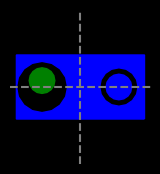

|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|

Relationship: Surrounds


In [10]:
ax = plot_ab(a.regions['0A'], b.regions['1A'])

r = DE27IM(a,b)

print(str(r))
print(r.identify_relation())

- This one is *Shelters* because the holes are open.

In [ ]:
box10x5 = box_points(10,5)
circle4_left = circle_points(2, offset_x=-3)
circle3_right = circle_points(1.5, offset_x=3)
circle2_left = circle_points(1, offset_x=-3, offset_y=0.5)
circle2_right = circle_points(1, offset_x=3)
slice_data = [
    ContourPoints(box10x5, roi=0, slice_index=0.0),
    ContourPoints(box10x5, roi=0, slice_index=1.0),
    ContourPoints(box10x5, roi=0, slice_index=2.0),

    ContourPoints(circle4_left, roi=0, slice_index=0.0),
    ContourPoints(circle4_left, roi=0, slice_index=1.0),
    ContourPoints(circle4_left, roi=0, slice_index=2.0),

    ContourPoints(circle3_right, roi=0, slice_index=0.0),
    ContourPoints(circle3_right, roi=0, slice_index=1.0),
    ContourPoints(circle3_right, roi=0, slice_index=2.0),

    ContourPoints(circle2_right, roi=0, slice_index=0.0),
    ContourPoints(circle2_right, roi=0, slice_index=1.0),
    ContourPoints(circle2_right, roi=0, slice_index=2.0),

    ContourPoints(circle2_left, roi=1, slice_index=0.0),
    ContourPoints(circle2_left, roi=1, slice_index=1.0),
    ContourPoints(circle2_left, roi=1, slice_index=2.0)

]

contour_table, slice_sequence = build_contour_table(slice_data)


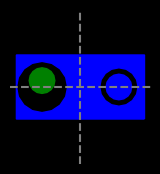

|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|

Relationship: Shelters


In [12]:
contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=0)
contour_graph_b, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=1)
a = RegionSlice(contour_graph_a, slice_index=1.0)
b = RegionSlice(contour_graph_b, slice_index=1.0)
ax = plot_ab(a.regions['0A'], b.regions['1A'])

r = DE27IM(a,b)

print(str(r))
print(r.identify_relation())

# Using degree = 1 to identify boundaries will miss some boundaries
- If there is a bifurcation in the contour on the slice before the boundary the degree will be 2, for a boundary contour.
- degree = 1 is a sufficient to identify boundaries, but not a necessary condition for a boundary.
- if degree > 1, but all edges point in the same (SliceIndex) direction, then it is also a boundary.

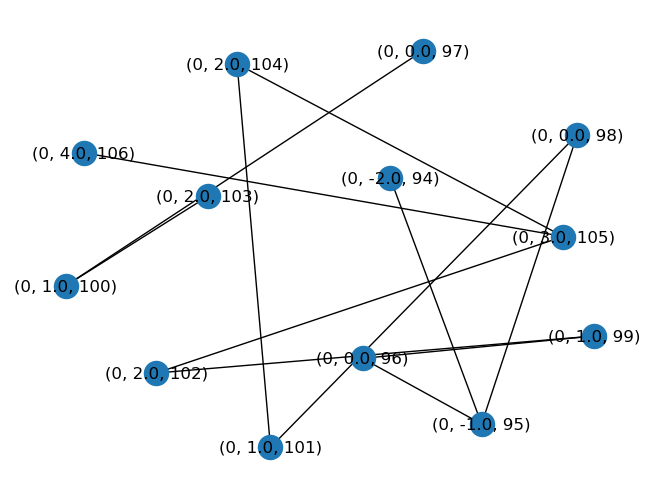

In [15]:
contour_graph = nx.Graph()
roi=0
contour_by_slice = build_contours(contour_table, roi)
for contour_data in contour_by_slice.values():
        for contour in contour_data:
            contour_label = contour.index
            contour_graph.add_node(contour_label, contour=contour)
contour_graph = add_graph_edges(contour_graph, slice_sequence)

nx.draw(contour_graph, with_labels=True,
           pos=nx.arf_layout(contour_graph))
plt.show()

In [16]:
contour_lookup = build_contour_lookup(contour_graph)

contour_lookup.loc[contour_lookup.ROI==0, ['SliceIndex', 'HoleType', 'Label']]

,SliceIndex,HoleType,Label
0,-2.0,None,"(0, -2.0, 94)"
1,-1.0,None,"(0, -1.0, 95)"
2,0.0,None,"(0, 0.0, 96)"
3,0.0,Unknown,"(0, 0.0, 97)"
4,0.0,None,"(0, 0.0, 98)"
5,1.0,None,"(0, 1.0, 99)"
6,1.0,Unknown,"(0, 1.0, 100)"
7,1.0,None,"(0, 1.0, 101)"
8,2.0,None,"(0, 2.0, 102)"
9,2.0,Unknown,"(0, 2.0, 103)"


In [17]:
[(node, degree) for node, degree in contour_graph.degree()]

[((0, -2.0, 94), 1),
 ((0, -1.0, 95), 3),
 ((0, 0.0, 96), 2),
 ((0, 0.0, 97), 1),
 ((0, 0.0, 98), 2),
 ((0, 1.0, 99), 2),
 ((0, 1.0, 100), 2),
 ((0, 1.0, 101), 2),
 ((0, 2.0, 102), 2),
 ((0, 2.0, 103), 1),
 ((0, 2.0, 104), 2),
 ((0, 3.0, 105), 3),
 ((0, 4.0, 106), 1)]

In [18]:
boundary_nodes = {node for node, degree in contour_graph.degree()
                    if degree == 1}
boundary_nodes

{(0, -2.0, 94), (0, 0.0, 97), (0, 2.0, 103), (0, 4.0, 106)}

# ValueError: setting an array element with a sequence. 
- The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (17,) + inhomogeneous part.

In [ ]:
box10x5 = box_points(10,5)

circle6 = circle_points(3)
circle5 = circle_points(2.5)
circle4 = circle_points(2)
circle3 = circle_points(1.5)
circle2 = circle_points(1)
slice_data = [
    # Adding this contour triggers the error
    #ContourPoints(circle6, roi=0, slice_index=-1.0),

    # Adding this contour DOES NOT trigger the error
    #ContourPoints(circle2, roi=0, slice_index=-1.0),

    # Adding this contour DOES NOT trigger the error
    #ContourPoints(box10x5, roi=0, slice_index=-1.0),

    # Adding both contours DOES NOT trigger the error
    #ContourPoints(circle5, roi=0, slice_index=-1.0),

    # Adding this contour triggers the error
    #ContourPoints(circle5, roi=0, slice_index=-1.0),

    ContourPoints(circle6, roi=0, slice_index=0.0),
    ContourPoints(circle6, roi=0, slice_index=1.0),
    ContourPoints(circle6, roi=0, slice_index=2.0),

    # Adding this contour triggers the error
    #ContourPoints(circle6, roi=0, slice_index=3.0),


    #ContourPoints(circle6, roi=0, slice_index=4.0),

    ContourPoints(circle5, roi=0, slice_index=0.0),
    ContourPoints(circle5, roi=0, slice_index=1.0),
    ContourPoints(circle5, roi=0, slice_index=2.0),

    ContourPoints(circle2, roi=0, slice_index=0.0),
    ContourPoints(circle2, roi=0, slice_index=1.0),
    ContourPoints(circle2, roi=0, slice_index=2.0),

    ContourPoints(circle4, roi=1, slice_index=0.0),
    ContourPoints(circle4, roi=1, slice_index=1.0),
    ContourPoints(circle4, roi=1, slice_index=2.0),

    ContourPoints(circle3, roi=1, slice_index=0.0),
    ContourPoints(circle3, roi=1, slice_index=1.0),
    ContourPoints(circle3, roi=1, slice_index=2.0),
]
contour_table, slice_sequence = build_contour_table(slice_data)
contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=0)
contour_graph_b, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=1)
a = RegionSlice(contour_graph_a, slice_index=1.0)
b = RegionSlice(contour_graph_b, slice_index=1.0)


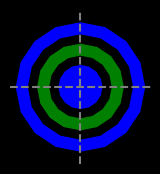

In [16]:
ax = plot_ab(a.regions['0A'], b.regions['1A'])


In [17]:

r = DE27IM(a,b)

print(str(r))
print(r.identify_relation())


|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|

Relationship: Shelters
